In [3]:
import madmom as mm
import numpy as np
from madmom.features.beats import RNNBeatProcessor
import madmom

In [4]:
act = RNNBeatProcessor()('Not A Romance.wav')

/anaconda/lib/python3.6/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [5]:
proc = madmom.features.beats.BeatTrackingProcessor(fps=100)

In [6]:
stuff = proc(act)

In [7]:
intervals = []
for i in range(len(stuff)-1):
    intervals.append(stuff[i+1] - stuff[i])

from collections import Counter
data = Counter(intervals)
qqq = 0
iii = 0
for x in data.most_common():
    qqq += x[0]*x[1]#*x[1]
    iii += x[1]#*x[1]
qqq /= iii
print(60/qqq)

163.990175704


In [8]:
proc1 = RNNBeatProcessor()
probs = proc1('Not A Romance.wav')  

/anaconda/lib/python3.6/site-packages/scipy/io/wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [9]:
print(max(probs))
bpm = float(round(60/qqq))
print(bpm)

0.707564
164.0


In [10]:
for i in range(len(probs)):
    if probs[i] >= max(probs): 
        offset = float(i)/float(100)
print(offset)

151.15


In [11]:
h = offset
while h > -10:
    h -= 60.0/bpm-0.003
    print(h)

150.78714634146343
150.42429268292685
150.06143902439027
149.6985853658537
149.3357317073171
148.97287804878053
148.61002439024395
148.24717073170737
147.8843170731708
147.5214634146342
147.15860975609763
146.79575609756105
146.43290243902447
146.0700487804879
145.70719512195132
145.34434146341474
144.98148780487816
144.61863414634158
144.255780487805
143.89292682926842
143.53007317073184
143.16721951219526
142.80436585365868
142.4415121951221
142.07865853658552
141.71580487804894
141.35295121951236
140.99009756097578
140.6272439024392
140.26439024390262
139.90153658536605
139.53868292682947
139.1758292682929
138.8129756097563
138.45012195121973
138.08726829268315
137.72441463414657
137.36156097561
136.9987073170734
136.63585365853683
136.27300000000025
135.91014634146367
135.5472926829271
135.1844390243905
134.82158536585393
134.45873170731736
134.09587804878078
133.7330243902442
133.37017073170762
133.00731707317104
132.64446341463446
132.28160975609788
131.9187560975613
131.55590243

In [12]:
print(stuff[0:10])

[ 0.02  0.39  0.76  1.12  1.48  1.84  2.2   2.57  2.96  3.34]


/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:11: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.


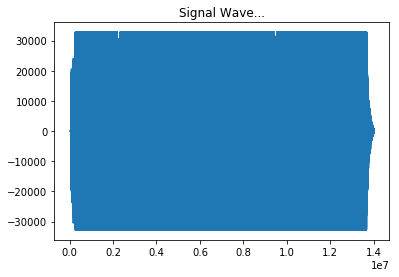

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import wave
import sys


spf = wave.open('Not a Romance.wav','r')

#Extract Raw Audio from Wav File
signal = spf.readframes(-1)
signal = np.fromstring(signal, 'Int16')


#If Stereo
#if spf.getnchannels() == 2:
 #   sys.exit(0)

plt.figure(1)
plt.title('Signal Wave...')
plt.plot(signal)
plt.show()

In [14]:
# We'll need numpy for some mathematical operations
import numpy as np

# matplotlib for displaying the output
import matplotlib.pyplot as plt
import matplotlib.style as ms
ms.use('seaborn-muted')
%matplotlib inline

# and IPython.display for audio output
import IPython.display

# Librosa for audio
import librosa
# And the display module for visualization
import librosa.display

In [15]:
audio_path = 'trac.wav'

y, sr = librosa.load(audio_path)

In [16]:
y_harmonic, y_percussive = librosa.effects.hpss(y)

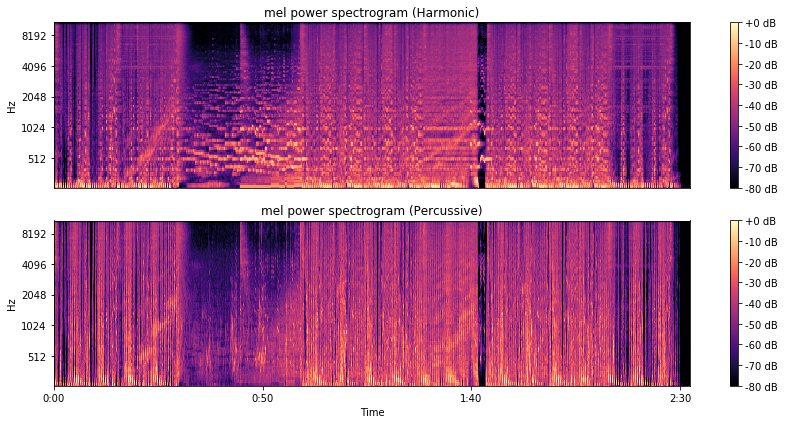

In [17]:
# What do the spectrograms look like?
# Let's make and display a mel-scaled power (energy-squared) spectrogram
S_harmonic   = librosa.feature.melspectrogram(y_harmonic, sr=sr)
S_percussive = librosa.feature.melspectrogram(y_percussive, sr=sr)

# Convert to log scale (dB). We'll use the peak power as reference.
log_Sh = librosa.power_to_db(S_harmonic, ref=np.max)
log_Sp = librosa.power_to_db(S_percussive, ref=np.max)

# Make a new figure
plt.figure(figsize=(12,6))

plt.subplot(2,1,1)
# Display the spectrogram on a mel scale
librosa.display.specshow(log_Sh, sr=sr, y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram (Harmonic)')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

plt.subplot(2,1,2)
librosa.display.specshow(log_Sp, sr=sr, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram (Percussive)')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

(6565, 128)
6565
1567820.02656 -548496.279933 783910.01328 509661.873314


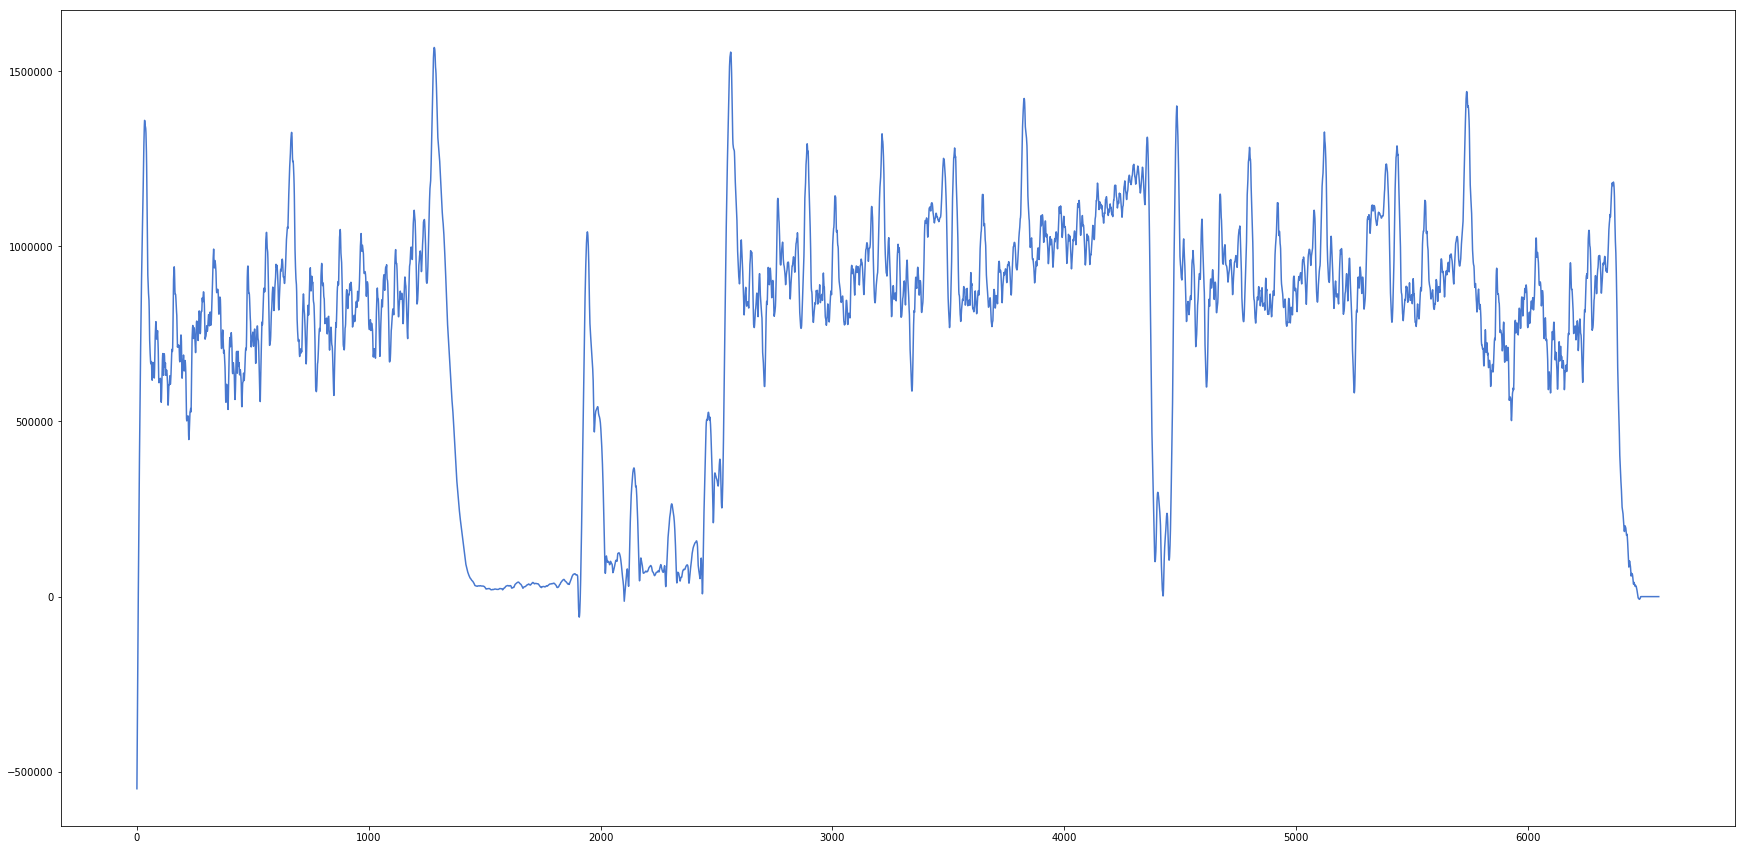

In [18]:
from scipy.signal import savgol_filter

ack = []
pe = log_Sp.transpose()
print(pe.shape)
for i in range(pe.shape[0]):
    ack.append(pe[i][100:])
#print(ack)
sums = []
print(len(ack))
for i in range(len(ack)):
    sums.append(ack[i].sum())
m = min(sums)

for i in range(len(sums)):
    sums[i] -= m
    sums[i] = sums[i]**2
#for i in range(len(sums)):
 #   sums[i] -= sums.sum()/len(sums)

ack2 = savgol_filter(sums, window_length=51, polyorder=2) 

#for i in range(len(sums)):
 #   sums[i] -= m*2
print(max(ack2), min(ack2), max(ack2)/2, (max(ack2)+min(ack2))/2)
import matplotlib.pyplot as plt
plt.figure(figsize=(30,15))
plt.plot(ack2)

plt.show()

In [21]:
from librosa.core import frames_to_time
idea = []
mean_mel = (max(ack2)+min(ack2))/2

stream_flag = 0
stream = []
for lvl in range(len(ack2)):
    if ack2[lvl] > mean_mel and stream_flag == 0:
        stream_flag = 1
        stream.append(lvl)
    elif ack2[lvl] < mean_mel and stream_flag == 1:
        stream_flag = 0
        stream.append(lvl)
        print(stream)
        stream = frames_to_time(stream[:])
        print(stream)
        idea.append(stream)
        stream = []
        

for k in idea:
    k[0] = round(time_to_beat(164, 0.20287804878180116, k[0]))
    k[0] = round(time_to_beat(164, 0.20287804878180116, k[0]))


    
        

[13, 214]
[ 0.30185941  4.96907029]
[217, 222]
[ 5.03873016  5.15482993]
[228, 1365]
[  5.29414966  31.6952381 ]
[1925, 1971]
[ 44.6984127   45.76653061]
[1977, 1997]
[ 45.90585034  46.37024943]
[2462, 2469]
[ 57.16752834  57.33006803]
[2471, 2473]
[ 57.37650794  57.42294785]
[2532, 4378]
[  58.79292517  101.65696145]
[4467, 5928]
[ 103.72353741  137.64789116]
[5930, 6393]
[ 137.69433107  148.44517007]
0.57940309258 0.301859410431
4.66607971445 1.0
28.3074269851 5.03873015873
162.714860202 28.0
29.8025655283 5.29414965986
174.422177275 30.0
260.461666242 44.6984126984
1520.76364069 260.0
267.529593901 45.9058503401
1567.59290898 268.0
333.451611488 57.1675283447
1948.08071386 333.0
334.67490666 57.3765079365
1959.78803093 335.0
342.96612949 58.7929251701
2006.61729923 343.0
605.974591412 103.723537415
3546.12949435 606.0
804.82801766 137.694331066
4711.00754313 805.0


In [20]:
beats_count = frames_to_time(len(ack2))

def time_to_beat(bpm, first_beat, timestamp):
    apprx_beat = (timestamp - first_beat)/(bpm/60.0/16.0)
    print(apprx_beat, timestamp)
    return apprx_beat
    

In [28]:
idea2 = []

print(idea)
for z in idea:
    stream2 = []
    stream2.append(round(time_to_beat(164, 0.20287804878180116, z[0])))
    stream2.append(round(time_to_beat(164, 0.20287804878180116, z[1])))
    idea2.append(stream2)
    print(stream2)
                   

[array([ 5.        ,  4.96907029]), array([ 163.        ,    5.15482993]), array([ 174.       ,   31.6952381]), array([ 1521.        ,    45.76653061]), array([ 1568.        ,    46.37024943]), array([ 1948.        ,    57.33006803]), array([ 1960.        ,    57.42294785]), array([ 2007.        ,   101.65696145]), array([ 3546.        ,   137.64789116]), array([ 4711.        ,   148.44517007])]
28.0807138608 5.0
27.8996619278 4.96907029478
[28.0, 28.0]
952.958762641 163.0
28.9870354138 5.15482993197
[953.0, 29.0]
1017.34900654 174.0
184.345522223 31.6952380952
[1017.0, 184.0]
8902.22705532 1521.0
266.714063786 45.7665306122
[8902.0, 267.0]
9177.34900654 1568.0
270.248027616 46.3702494331
[9177.0, 270.0]
11401.7392504 1948.0
334.403063288 57.3300680272
[11402.0, 334.0]
11471.9831529 1960.0
334.946750031 57.4229478458
[11472.0, 335.0]
11747.1051041 2007.0
593.87756138 101.656961451
[11747.0, 594.0]
20755.8855919 3546.0
804.556174289 137.647891156
[20756.0, 805.0]
27575.397787 4711.0
867

In [30]:
bpm = 164.0
track_len = (frames_to_time(len(ack2))-0.20287804878180116)/(bpm/60.0)
print(frames_to_time(len(ack2))-0.20287804878180116)
print(frames_to_time(len(ack2)), track_len)
b = []
for i in range(int(track_len)*16):
    if i == idea2[0][0]:
        b.append('1000')
        stream_flag = 1
    elif stream_flag == 0:
        b.append('0000')
    elif i == idea2[0][1]:
        b.append('1000')
        stream_flag = 0
    elif stream_flag == 1:
        b.append('1000')

        
    if i%16 == 0:
        b.append(',')

[ 152.23612422]
[ 152.43900227] [ 55.69614301]


In [31]:
print(b)

['1000', ',', '1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000', ',', '1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000', ',', '1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000', ',', '1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000', ',', '1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000', ',', '1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000', ',', '1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000', '1000', ',', '1000', '1000', '1000', '1000', '1000', '1000', '1000',